<a href="https://colab.research.google.com/github/ashishar/data_science_codes/blob/main/qudits_density_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The Cirq Developers

In [3]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Qudits

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/build/qudits"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/build/qudits.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/build/qudits.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/build/qudits.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [16]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

try:
    import qiskit
except ImportError:
    print("installing qiskit...")
    !pip install --quiet qiskit
    print("installed qiskit.")

Most of the time in quantum computation, we work with qubits, which are 2-level quantum systems. However, it is possible to also define quantum computation with higher dimensional systems. A qu-*d*-it is a generalization of a qubit to a d-level or d-dimension system.  For example, the state of a single qubit is a superposition of two basis states, $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$, whereas the state of a qudit for a three dimensional system is a superposition of three basis states $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle+\gamma|2\rangle$.

Qudits with known values for d have specific names. A **qubit** has dimension 2, a **qutrit** has dimension 3, a **ququart** has dimension 4, and so on.
In Cirq, qudits work exactly like qubits except they have a `dimension` attribute different than 2, and they can only be used with gates specific to that dimension. In cirq, both qubits and qudits are subclasses of the class `cirq.Qid`. 

To apply a gate to some qudits, the dimensions of the qudits must match the dimensions it works on.  For example, consider gate represents a unitary evolution on three qudits,. Further suppose that there are a qubit, a qutrit, and another qutrit. Then the gate's "qid shape" is `(2, 3, 3)` and its `on` method will accept exactly 3 `Qid`s with dimension 2, 3, and 3, respectively.

This is an example single qutrit gate acting on a single qutrit in a simple quantum circuit:


In [5]:
import cirq
import numpy as np

class QutritPlusGate(cirq.Gate):
    """A gate that adds one in the computational basis of a qutrit.
    
    This gate acts on three-level systems. In the computational basis of
    this system it enacts the transformation U|x〉 = |x + 1 mod 3〉, or
    in other words U|0〉 = |1〉, U|1〉 = |2〉, and U|2> = |0〉.
    """
    
    def _qid_shape_(self):
        # By implementing this method this gate implements the
        # cirq.qid_shape protocol and will return the tuple (3,)
        # when cirq.qid_shape acts on an instance of this class.
        # This indicates that the gate acts on a single qutrit.
        return (3,)

    def _unitary_(self):
        # Since the gate acts on three level systems it has a unitary 
        # effect which is a three by three unitary matrix.
        return np.array([[0, 0, 1],
                         [1, 0, 0],
                         [0, 1, 0]])

    def _circuit_diagram_info_(self, args):
        return '[+1]'

# Here we create a qutrit for the gate to act on. 
q0 = cirq.LineQid(0, dimension=3)

# We can now enact the gate on this qutrit.
circuit = cirq.Circuit(
    QutritPlusGate().on(q0)
)

# When we print this out we see that the qutrit is labeled by its dimension.
print(circuit)

0 (d=3): ───[+1]───


## cirq.Qid

`cirq.Qid` is the type that represents both qubits and qudits.

Cirq has the built-in qubit types, `cirq.NamedQubit`, `cirq.GridQubit`, and `cirq.LineQubit`, and it also provides corresponding `cirq.Qid` types: 

- `cirq.NamedQid`
  - Example: Create a qutrit named 'a' by specifying the dimension in the constructor: `cirq.NamedQid('a', dimension=3)`.
- `cirq.GridQid` 
  - Example: Create a qutrit at location (2, 0) by specifying the dimension in the constructor: `cirq.GridQid(2, 0, dimension=3)`.
  - Example: You can create regions of `cirq.GridQid`s. For example, to create a 2x2 grid of ququarts, use `cirq.GridQid.rect(2, 2, dimension=4)`.
- `cirq.LineQid` 
  - Example: Create a qutrit at location 1 on the line by specifying the dimension in the constructor: `cirq.LineQid(0, dimension=3)`.
  - Example: You can create ranges of `cirq.LineQid`s. For example, to create qutrits on a line with locations from 0 to 4, use `cirq.LineQid.range(5, dimension=3)`.
  
By default `cirq.Qid` classes in cirq will default to qubits unless their `dimension` parameter is specified in creation. Thus a `cirq.Qid` like `cirq.NamedQid('a')` is a qubit.

### The `cirq.qid_shape` protocol

Quantum gates, operations, and other types that act on a sequence of qudits can specify the dimension of each qudit they act on by implementing the `_qid_shape_` magic method.  This method returns a tuple of integers corresponding to the required dimension of each qudit it operates on, e.g. `(2, 3, 3)` means an object that acts on a qubit, a qutrit, and another qutrit.  When you specify `_qid_shape_` we say that the object implements the `qid_shape` protocol.

When `cirq.Qid`s are used with `cirq.Gate`s, `cirq.Operation`s, and `cirq.Circuit`s, the dimension of each qid must match the corresponding entry in the qid shape. An error is raised otherwise.

Callers can query the qid shape of an object or a list of `Qid`s by calling `cirq.qid_shape` on it. By default, `cirq.qid_shape` will return the equivalent qid shape for qubits if `_qid_shape_` is not defined.  In particular, for a qubit-only gate the qid shape is a tuple of 2s containing one 2 for each qubit e.g. `(2,) * cirq.num_qubits(gate)`.

In [6]:
# Create an instance of the qutrit gate defined above.
gate = QutritPlusGate()

# Verify that it acts on a single qutrit.
print(cirq.qid_shape(gate))

(3,)


### Unitaries, mixtures, and channels on qudits

The magic methods `_unitary_`, `_apply_unitary_`, `_mixture_`, and `_kraus_` can be used to define unitary gates, mixtures, and channels can be used with qudits (see [protocols](protocols.md) for how these work.)

Because the state space for qudits for $d>2$ live on larger dimensional spaces, the corresponding objects returned by the magic methods will be of corresponding higher dimension. 

In [7]:
# Create an instance of the qutrit gate defined above. This gate implements _unitary_.
gate = QutritPlusGate()

# Because it acts on qutrits, its unitary is a 3 by 3 matrix.
print(cirq.unitary(gate))

[[0 0 1]
 [1 0 0]
 [0 1 0]]


For a single qubit gate, its unitary is a 2x2 matrix, whereas for a single qutrit gate its unitary is a 3x3 matrix.  A two qutrit gate will have a unitary that is a 9x9 matrix (3 * 3 = 9) and a qubit-ququart gate will have a unitary that is an 8x8 matrix (2 * 4 = 8).  The size of the matrices involved in defining mixtures and channels follow the same pattern.

### Simulating qudits

Cirq's simulators can be used to simulate or sample from circuits which act on qudits.

Simulators like `cirq.Simulator` and `cirq.DensityMatrixSimulator` will return simulation results with larger states than the same size qubit circuit when simulating qudit circuits. The size of the state returned is determined by the product of the dimensions of the qudits being simulated. For example, the state vector output of `cirq.Simulator` after simulating a circuit on a qubit, a qutrit, and a qutrit will have 2 * 3 * 3 = 18 elements. You can call `cirq.qid_shape(simulation_result)` to check the qudit dimensions.


In [8]:
# Create a circuit from the gate we defined above.
q0 = cirq.LineQid(0, dimension=3)
circuit = cirq.Circuit(QutritPlusGate()(q0))

# Run a simulation of this circuit.
sim = cirq.Simulator()
result = sim.simulate(circuit)

# Verify that the returned state is that of a qutrit.
print(cirq.qid_shape(result))

(3,)


Circuits on qudits are always assumed to start in the $|0\rangle$ computational basis state, and all the computational basis states of a qudit are assumed to be $|0\rangle$, $|1\rangle$, ..., $|d-1\rangle$.  Correspondingly, measurements of qudits are assumed to be in the computational basis and for each qudit return an integer corresponding to these basis states.  Thus measurement results for each qudit are assumed to run from $0$ to $d-1$.

In [50]:
# Create a circuit with three qutrit gates.
q0, q1 = cirq.LineQid.range(2, dimension=3)

circuit = cirq.Circuit()
# circuit.append(cirq.H(q0))
# circuit.append(cirq.CNOT(q0,q1))


circuit.append(QutritPlusGate()(q0))
circuit.append(QutritPlusGate()(q1))
circuit.append(QutritPlusGate()(q1))


circuit.append(cirq.measure(q0, q1, key="x"))

# Sample from this circuit.
result = cirq.sample(circuit, repetitions=100)

# See that the results are all integers from 0 to 2.
#print(result)

In [51]:
print(circuit)

0 (d=3): ───[+1]──────────M('x')───
                          │
1 (d=3): ───[+1]───[+1]───M────────


In [52]:
# Simulate with the density matrix simulator.
dsim = cirq.DensityMatrixSimulator()
rho = dsim.simulate(circuit).final_density_matrix

# Display the final density matrix.
print("\nFinal density matrix:")
print(rho)

rho_re=rho.real
rho_im=rho.imag


Final density matrix:
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


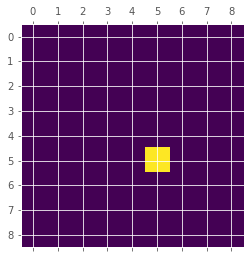

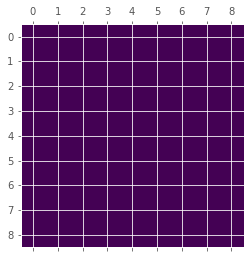

In [53]:
import matplotlib.pyplot as plot
import numpy as np

%matplotlib inline

plot.matshow(rho_re)
 

plot.matshow(rho_im) 

In [ ]:
density_matrix=cirq.final_density_matrix([
    QutritPlusGate()(q0), 
    QutritPlusGate()(q1),
   # QutritPlusGate()(q1),
])


# Sample from this circuit


In [ ]:
print(cirq.X)
print("cirq.X unitary:\n", cirq.unitary(cirq.X))

a, b = cirq.LineQubit.range(2)
circuit = cirq.Circuit(cirq.X(a), cirq.Y(b))
print(circuit)
print("circuit unitary:\n", cirq.unitary(circuit))

In [ ]:
print(density_matrix)

In [ ]:
circuit.density_matrix